In [1]:
import tensorflow as tf

In [2]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (7,7) # Make the figures a bit bigger

from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.utils import np_utils

Using TensorFlow backend.


In [3]:
nb_classes = 12

# the data, shuffled and split between tran and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print("X_train original shape", X_train.shape)
print("y_train original shape", y_train.shape)
print("X_test0  original shape", X_test[0].shape)

X_train original shape (60000, 28, 28)
y_train original shape (60000,)
X_test0  original shape (28, 28)


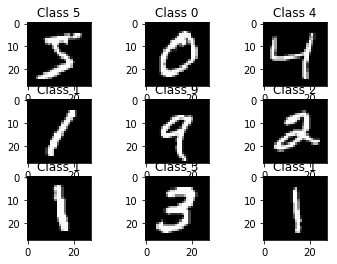

In [4]:
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(X_train[i], cmap='gray', interpolation='none')
    plt.title("Class {}".format(y_train[i]))

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 0 0 3 18 18 18 126 136 175 26 166 255 247 127 0 0 0 0 
0 0 0 0 0 0 0 0 30 36 94 154 170 253 253 253 253 253 225 172 253 242 195 64 0 0 0 0 
0 0 0 0 0 0 0 49 238 253 253 253 253 253 253 253 253 251 93 82 82 56 39 0 0 0 0 0 
0 0 0 0 0 0 0 18 219 253 253 253 253 253 198 182 247 241 0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 80 156 107 253 253 205 11 0 43 154 0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 14 1 154 253 90 0 0 0 0 0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 0 139 253 190 2 0 0 0 0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 0 11 190 253 70 0 0 0 0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 0 0 35 241 225 160 108 1 0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 0 0 0 81 240 253 253 119 25 0 0 0 0 0 0 0 0 0 


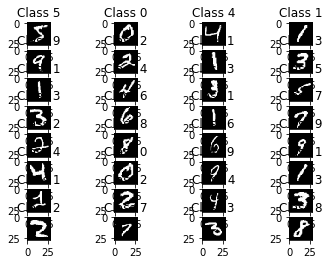

In [5]:
for line in X_train[0]:
    linestr=''
    for pix in line:
        linestr+=str(pix)+' '
    print(linestr) 

for i in range(32):
    plt.subplot(8,4,i+1)
    plt.imshow(X_train[i], cmap='gray', interpolation='none')
    plt.title("Class {}".format(y_train[i]))

print(y_train)

In [6]:
import cv2
Xtrain0=X_train[0]
cv2.imshow("mw",Xtrain0)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [7]:
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print("Training matrix shape", X_train.shape)
print("Testing matrix shape", X_test.shape)

Training matrix shape (60000, 784)
Testing matrix shape (10000, 784)


In [8]:
#print(X_train[0])

linestr=''
for i in range(len(X_train[0])):
    j=i%28
    if(j==0):
        print(linestr)
        linestr=""
    linestr+="%.1f"%X_train[0][i]+" "


0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 
0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 
0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 
0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 
0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 
0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.1 0.1 0.1 0.5 0.5 0.7 0.1 0.7 1.0 1.0 0.5 0.0 0.0 0.0 0.0 
0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.1 0.1 0.4 0.6 0.7 1.0 1.0 1.0 1.0 1.0 0.9 0.7 1.0 0.9 0.8 0.3 0.0 0.0 0.0 0.0 
0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.2 0.9 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 0.4 0.3 0.3 0.2 0.2 0.0 0.0 0.0 0.0 0.0 
0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.1 0.9 1.0 1.0 1.0 1.0 1.0 0.8 0.7 1.0 0.9 0.0 0.0 0.0 0.0 0.0 0.0

In [9]:
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)
print(len(Y_train))
print(len(Y_train[0]))
print(Y_train)
print(Y_test)

60000
12
[[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [10]:
model = Sequential()
model.add(Dense(512, input_shape=(784,)))
model.add(Activation('relu')) # An "activation" is just a non-linear function applied to the output
                              # of the layer above. Here, with a "rectified linear unit",
                              # we clamp all values below 0 to 0.
                           
model.add(Dropout(0.2))   # Dropout helps protect the model from memorizing or "overfitting" the training data
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(nb_classes))
model.add(Activation('softmax')) # This special "softmax" activation among other things,
                                 # ensures the output is a valid probaility distribution, that is
                                 # that its values are all non-negative and sum to 1.

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [11]:
model.compile(loss='categorical_crossentropy', optimizer='adam')

In [12]:
model.fit(X_train, Y_train,
          batch_size=128, epochs=4,verbose=1,
          validation_data=(X_test, Y_test))

Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/4
60000/60000 [==============================] - 8s 141us/step - loss: 0.2506 - val_loss: 0.1330
Epoch 2/4
60000/60000 [==============================] - 8s 138us/step - loss: 0.1007 - val_loss: 0.0800
Epoch 3/4
60000/60000 [==============================] - 8s 134us/step - loss: 0.0717 - val_loss: 0.0688
Epoch 4/4
60000/60000 [==============================] - 8s 132us/step - loss: 0.0536 - val_loss: 0.0702


In [13]:
score = model.evaluate(X_test, Y_test,verbose=1)
print(score)

10000/10000 [==============================] - 0s 38us/step
0.07017672946398379


In [14]:
# The predict_classes function outputs the highest probability class
# according to the trained classifier for each input example.
predicted_classes = model.predict_classes(X_test)

print(predicted_classes)
print(len(predicted_classes))

# Check which items we got right / wrong
predictyes=(predicted_classes == y_test)
print(predictyes)

predictnum=np.nonzero(predictyes)
print(predictnum)

correct_indices = np.nonzero(predicted_classes == y_test)[0]
incorrect_indices = np.nonzero(predicted_classes != y_test)[0]

print("correct",correct_indices)
print("incorrect",incorrect_indices)

[7 2 1 ... 4 5 6]
10000
[ True  True  True ...  True  True  True]
(array([   0,    1,    2, ..., 9997, 9998, 9999], dtype=int64),)
correct [   0    1    2 ... 9997 9998 9999]
incorrect [  96  149  158  247  321  381  447  448  449  495  582  619  684  691
  707  720  740  810  938  947  951  956  982 1014 1039 1112 1156 1178
 1181 1182 1194 1226 1232 1242 1247 1260 1299 1319 1328 1393 1414 1425
 1444 1496 1522 1530 1549 1553 1609 1681 1717 1751 1754 1782 1790 1800
 1828 1901 1952 1984 2004 2018 2024 2033 2035 2052 2053 2098 2118 2130
 2135 2182 2272 2369 2405 2408 2422 2462 2488 2514 2573 2648 2654 2720
 2743 2771 2877 2896 2907 2927 2930 2939 2952 2953 3030 3073 3108 3117
 3225 3333 3405 3422 3451 3503 3520 3533 3549 3558 3597 3727 3776 3808
 3818 3853 3893 3906 3941 3943 3951 3985 4065 4102 4176 4199 4201 4248
 4433 4437 4443 4497 4536 4571 4578 4601 4635 4690 4731 4761 4807 4814
 4823 4880 4956 4990 5199 5331 5600 5623 5642 5676 5749 5842 5926 5936
 5937 5955 5973 6011 6045 6059 617

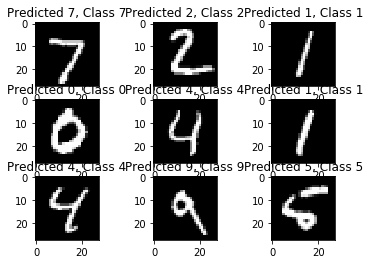

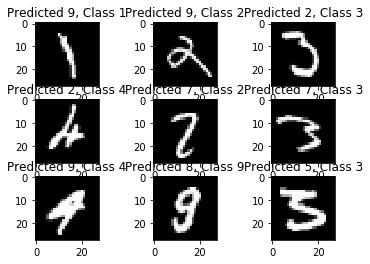

In [15]:
plt.figure()
for i, correct in enumerate(correct_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[correct], y_test[correct]))
    
plt.figure()
for i, incorrect in enumerate(incorrect_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect], y_test[incorrect]))


In [16]:
import cv2
import numpy as np

img=cv2.imread("E:\Pr\one-eight.jpg")
W=350
L=450
NW=320
NL=320
X0=80
Y0=45
for i in range(2):
    for j in range(4):
        imdig=img[X0+L*i:X0+L*i+NL,Y0+W*j:Y0+W*j+NW]
        cv2.imshow("imdig",imdig)
        filename="hn"+str(i)+str(j)+".jpg"
        cv2.rectangle(img,(Y0+W*j,X0+L*i),(Y0+W*j+NW,X0+L*i+NL),(0,255,0),3)        
        cv2.imwrite(filename,imdig)
        cv2.waitKey(0)
cv2.imshow("img",img)
cv2.waitKey()
cv2.destroyAllWindows()

In [17]:
import cv2  

for i in range(2):
    for j in range(4):
        filename="hn"+str(i)+str(j)+".jpg"
        img = cv2.imread(filename)
        GrayImage=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)  
        ret,thresh1=cv2.threshold(GrayImage,120,255,cv2.THRESH_BINARY)  
        resized_image = cv2.resize(thresh1, (28, 28)) 
        invimg = ~resized_image
        outputfile="hn28inv"+str(i)+str(j)+".jpg"
        print(outputfile)
        cv2.imwrite(outputfile,invimg)

hn28inv00.jpg
hn28inv01.jpg
hn28inv02.jpg
hn28inv03.jpg
hn28inv10.jpg
hn28inv11.jpg
hn28inv12.jpg
hn28inv13.jpg


In [18]:
import cv2
img = cv2.imread("hn28inv11.jpg")
print(len(img))
print(len(img[0]))
cv2.imshow("hninv",img)
cv2.waitKey(0)
cv2.destroyAllWindows()

28
28


x to be predicted original shape (28, 28, 3)
x to be predicted original shape (28, 28)


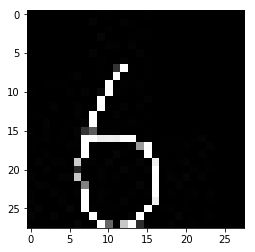

In [19]:
print("x to be predicted original shape", img.shape)
GrayImg=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
print("x to be predicted original shape", GrayImg.shape)
plt.imshow(GrayImg, cmap='gray', interpolation='none')

In [20]:
X_pred = GrayImg.reshape(1, 784)
X_pred = X_pred.astype('float32')
X_pred /= 255
print("Predicating matrix shape", X_pred.shape)

Predicating matrix shape (1, 784)


In [21]:
predicted_classes = model.predict_classes(X_pred)

print(predicted_classes)

[9]


In [22]:
import cv2
import numpy

X_pred = numpy.zeros(shape=(8,28,28))
index=0

for i in range(2):
    for j in range(4):
        filename="hn28inv"+str(i)+str(j)+".jpg"
        img = cv2.imread(filename)
        GrayImage=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
        X_pred[index]=cv2.resize(GrayImage, (28, 28))
        index+=1
print(X_pred.shape)

(8, 28, 28)


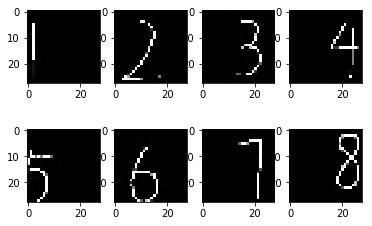

In [23]:
for i in range(8):
    plt.subplot(2,4,i+1)
    plt.imshow(X_pred[i], cmap='gray', interpolation='none')

In [24]:
X_pred = X_pred.reshape(8, 784)
X_pred = X_pred.astype('float32')
X_pred /= 255
print("Testing matrix shape", X_pred.shape)
predicted_classes = model.predict_classes(X_pred)
print(predicted_classes)

Testing matrix shape (8, 784)
[7 9 3 4 7 9 7 2]
